# 配置环境

In [ ]:
#挂载网盘
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#安装CONDA方便配置环境
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.7.12-Linux-x86_64.sh #Conda最新版本不兼容python2
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

#Conda配置python 2
conda install --channel defaults conda python=2.7 --yes
conda update --channel defaults --all --yes

#检查环境
!which conda # 返回/usr/local/bin/conda
!conda --version # 返回conda 版本
!which python # 依旧是/usr/local/bin/python
!python --version # 返回 Python 版本 :: Anaconda, Inc.

In [ ]:
#conda配置tensorflow-gpu
!conda install tensorflow-gpu=1.14.0 --yes
#安装依赖包 不要轻易修改版本！
#!pip install -r /content/drive/MyDrive/capsule/requirements.txt
!pip install tensorflow-gpu==1.14.0
!pip install keras==2.2.0 #尤其是这个
!pip install keras-applications==1.0.6
!pip install keras-preprocessing==1.0.5
!pip install sklearn
!pip install nltk==3.4.5

# 预处理

In [ ]:
#下载nltk包
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('reuters')

In [ ]:
%%bash
cd /root/nltk_data/corpora/
ls

In [ ]:
#预处理数据
!python /content/drive/MyDrive/capsule/reuters_process.py

# 模型

In [ ]:
#CNN
!python /content/drive/MyDrive/capsule/main.py --model_type CNN --learning_rate 0.0005

In [ ]:
#Capsule-A
!python /content/drive/MyDrive/capsule/main.py --model_type capsule-A --learning_rate 0.001 --batch_size 36

In [ ]:
#Capsule-B
!python /content/drive/MyDrive/capsule/main.py --model_type capsule-B --learning_rate 0.001

运行结果保存在[RESULT](https://docs.google.com/spreadsheets/d/15wkZQhAhCREJ0CzETM6Szj9ExckUREOfRnB22aa1QT0/edit?usp=sharing)

In [ ]:
import matplotlib.pyplot as plt
import  numpy as np
plt.figure()
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
x = [8,16,32,36,40,64,128]
y2 = [85.7,86.1,86.5,87,87.2,87,87.1]
plt.plot(x,y2,color='black', linewidth=1.2, marker=".", markersize=7)
plt.xlabel("batchsize")
plt.ylabel("accuracy (%)",rotation=90,horizontalalignment='right')
plt.show()

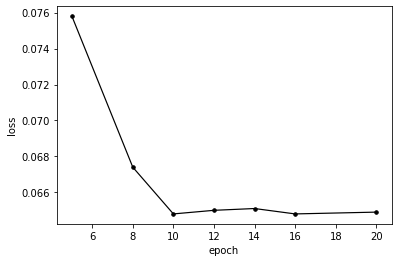

In [ ]:
import matplotlib.pyplot as plt
import  numpy as np
plt.figure()
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
x = [5,8,10,12,14,16,20]
y2 = [0.0758,0.0674,0.0648,0.0650,0.0651,0.0648,0.0649]
plt.plot(x,y2,color='black', linewidth=1.2, marker=".", markersize=7)
plt.xlabel("epoch")
plt.ylabel("loss",rotation=90,horizontalalignment='right')
plt.show()